In [2]:
!pip install matplotlib
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
dataset = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
dataset

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [5]:
dataset.pop('name')
dataset

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...
4335,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [6]:
dataset = pd.get_dummies(dataset, columns=['fuel', 'seller_type', 'transmission', 'owner'], prefix='', prefix_sep='')
dataset

,year,selling_price,km_driven,CNG,Diesel,Electric,LPG,Petrol,Dealer,Individual,Trustmark Dealer,Automatic,Manual,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
0,2007,60000,70000,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
1,2007,135000,50000,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
2,2012,600000,100000,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0
3,2017,250000,46000,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
4,2014,450000,141000,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,2014,409999,80000,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
4336,2014,409999,80000,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
4337,2009,110000,83000,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0
4338,2016,865000,90000,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0


In [7]:
X = dataset
y = dataset.pop('selling_price')
print(X)
print(y)

      year  km_driven  CNG  Diesel  Electric  LPG  Petrol  Dealer  Individual  \
0     2007      70000    0       0         0    0       1       0           1   
1     2007      50000    0       0         0    0       1       0           1   
2     2012     100000    0       1         0    0       0       0           1   
3     2017      46000    0       0         0    0       1       0           1   
4     2014     141000    0       1         0    0       0       0           1   
...    ...        ...  ...     ...       ...  ...     ...     ...         ...   
4335  2014      80000    0       1         0    0       0       0           1   
4336  2014      80000    0       1         0    0       0       0           1   
4337  2009      83000    0       0         0    0       1       0           1   
4338  2016      90000    0       1         0    0       0       0           1   
4339  2016      40000    0       0         0    0       1       0           1   

      Trustmark Dealer  Aut

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3038, 17) (3038,)
(1302, 17) (1302,)


In [9]:
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(X_train))
print(normalizer.mean.numpy())

[2.0131123e+03 6.5950977e+04 1.0533245e-02 4.8979592e-01 3.2916392e-04
 5.9249508e-03 4.9341673e-01 2.2778143e-01 7.4654377e-01 2.5674786e-02
 1.0599078e-01 8.9400923e-01 6.5404874e-01 2.0079000e-02 2.5115207e-01
 4.6082949e-03 7.0111915e-02]


In [10]:
first = np.array(X_train[:1])

with np.printoptions(precision=2, suppress=True):
    print('First example:', first)
    print()
    print('Normalized:', normalizer(first).numpy())

First example: [[  2012 155836      0      1      0      0      0      0      1      0
       0      1      0      0      1      0      0]]

Normalized: [[-0.26  1.91 -0.1   1.02 -0.02 -0.08 -0.99 -0.54  0.58 -0.16 -0.34  0.34
  -1.37 -0.14  1.73 -0.07 -0.27]]


In [18]:
model = tf.keras.Sequential([
    normalizer,
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 17)                35        
_________________________________________________________________
dense_7 (Dense)              (None, 128)               2304      
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_9 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_12 (Dense)             (None, 64)               

In [19]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    loss='mean_absolute_error')

history = model.fit(
    X_train, y_train,
    epochs=200,
    verbose=2,
    validation_split = 0.2)

Epoch 1/200
76/76 - 1s - loss: 459552.4062 - val_loss: 271670.4688
Epoch 2/200
76/76 - 0s - loss: 221014.3906 - val_loss: 194992.4219
Epoch 3/200
76/76 - 0s - loss: 198358.2656 - val_loss: 187978.8281
Epoch 4/200
76/76 - 0s - loss: 193220.0469 - val_loss: 185324.2969
Epoch 5/200
76/76 - 0s - loss: 190907.4531 - val_loss: 190449.1875
Epoch 6/200
76/76 - 0s - loss: 189378.8906 - val_loss: 182338.6406
Epoch 7/200
76/76 - 0s - loss: 188841.2812 - val_loss: 187101.4531
Epoch 8/200
76/76 - 0s - loss: 189730.9219 - val_loss: 181749.0625
Epoch 9/200
76/76 - 0s - loss: 185076.6406 - val_loss: 178309.1250
Epoch 10/200
76/76 - 0s - loss: 184268.0938 - val_loss: 176733.0938
Epoch 11/200
76/76 - 0s - loss: 183102.7031 - val_loss: 177195.6250
Epoch 12/200
76/76 - 0s - loss: 182490.6406 - val_loss: 175338.3750
Epoch 13/200
76/76 - 0s - loss: 182131.0625 - val_loss: 178651.7031
Epoch 14/200
76/76 - 0s - loss: 180588.2188 - val_loss: 182567.4688
Epoch 15/200
76/76 - 0s - loss: 180396.9375 - val_loss: 1

Epoch 122/200
76/76 - 0s - loss: 155712.3125 - val_loss: 154679.3438
Epoch 123/200
76/76 - 0s - loss: 154308.9531 - val_loss: 156194.9844
Epoch 124/200
76/76 - 0s - loss: 156923.5469 - val_loss: 173282.7812
Epoch 125/200
76/76 - 0s - loss: 156036.2500 - val_loss: 166302.5000
Epoch 126/200
76/76 - 0s - loss: 154780.6562 - val_loss: 156363.2031
Epoch 127/200
76/76 - 0s - loss: 155076.4062 - val_loss: 156937.4688
Epoch 128/200
76/76 - 0s - loss: 153214.5000 - val_loss: 166646.5312
Epoch 129/200
76/76 - 0s - loss: 154728.8125 - val_loss: 158659.8906
Epoch 130/200
76/76 - 0s - loss: 153002.3594 - val_loss: 166497.1406
Epoch 131/200
76/76 - 0s - loss: 154790.7656 - val_loss: 158029.3750
Epoch 132/200
76/76 - 0s - loss: 154447.7344 - val_loss: 159092.1250
Epoch 133/200
76/76 - 0s - loss: 156278.7656 - val_loss: 155762.3906
Epoch 134/200
76/76 - 0s - loss: 153869.7812 - val_loss: 154393.7812
Epoch 135/200
76/76 - 0s - loss: 153278.7344 - val_loss: 154320.4219
Epoch 136/200
76/76 - 0s - loss: 1

In [20]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
195,151711.671875,159652.296875,195
196,150615.250000,157582.906250,196
197,150673.031250,153883.515625,197
198,150331.093750,154307.875000,198
199,150126.328125,158914.703125,199


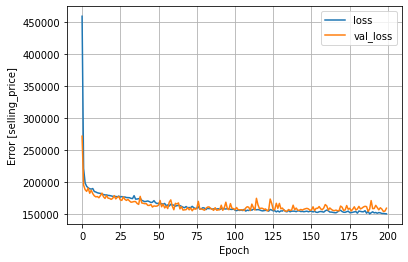

In [21]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error [selling_price]')
    plt.legend()
    plt.grid(True)

plot_loss(history)

In [43]:
print(X_test.tail)
print(y_test.tail)

<bound method NDFrame.tail of       year  km_driven  CNG  Diesel  Electric  LPG  Petrol  Dealer  Individual  \
927   2017      47162    0       1         0    0       0       0           0   
290   2018       4000    0       0         0    0       1       0           1   
770   2017      20000    0       1         0    0       0       0           1   
2539  2008      35008    0       0         0    0       1       1           0   
4289  2019      40000    0       1         0    0       0       0           1   
...    ...        ...  ...     ...       ...  ...     ...     ...         ...   
2892  2011      20000    0       0         0    0       1       1           0   
449   2017      30000    0       0         0    0       1       0           1   
1082  2005      90000    0       0         0    0       1       1           0   
676   2011     140000    0       1         0    0       0       0           1   
341   2016      25000    0       0         0    0       1       0           1  

In [56]:
predict_dataset = tf.convert_to_tensor([
    [2007,70000,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0],
    [2007,50000,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0],
    [2016,90000,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0],
    [2013,65000,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0]
])
predictions = model.predict(X_test)
# df = pd.DataFrame(data = (y_test,predictions))
y_pred = np.array(y_test)
# print(y_pred.reshape(-1,1))
y_pred.reshape(-1,1)
df = pd.DataFrame(data = (y_pred,predictions))
df.T

,0,1
0,2600000,[2630418.0]
1,360000,[459496.7]
2,2800000,[1451413.4]
3,221000,[177638.94]
4,680000,[887387.5]
...,...,...
1297,265000,[270023.12]
1298,390000,[403324.97]
1299,114999,[148254.4]
1300,311000,[329627.75]
